In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
# !pip install -q kaggle
# import os
# from google.colab import files
# uploaded = files.upload()
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list
# !kaggle datasets download -d rafatalkhatib/hijja2
# !unzip /content/hijja2.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          19490        420  1.0              
jainaru/thyroid-disease-data                                    Thyroid Disease Data                                 3KB  2024-05-10 12:06:31           1367         34  1.0              
sahirmaharajj/school-student-daily-attendance                   School Student Daily Attendance                      2MB  2024-04-29 19:29:56           4759        100  1.0              
sahir

In [25]:
import tensorflow as tf     ##tensorflow-gpu
import cv2                  ##opencv-python
import os
import matplotlib.pyplot as plt  ## matplotlib
import numpy as np
from google.colab.patches import cv2_imshow

In [26]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Make sure you have enabled the GPU runtime.')
else:
    print('GPU device found:', device_name)

GPU device found: /device:GPU:0


In [27]:
def resize_with_padding(image, target_size, padding_color=(0, 0, 0)):
    try:
        height, width = image.shape[:2]
        target_height, target_width = target_size

        # Calculate the aspect ratio of the original image
        aspect_ratio = width / height

        # Calculate the target aspect ratio
        target_aspect_ratio = target_width / target_height

        # Calculate the new size with padding
        if target_aspect_ratio > aspect_ratio:
            new_width = int(target_height * aspect_ratio)
            new_height = target_height
            pad_left = (target_width - new_width) // 2
            pad_right = target_width - new_width - pad_left
            pad_top = 0
            pad_bottom = 0
        else:
            new_width = target_width
            new_height = int(target_width / aspect_ratio)
            pad_left = 0
            pad_right = 0
            pad_top = (target_height - new_height) // 2
            pad_bottom = target_height - new_height - pad_top

        # Resize the image while maintaining the aspect ratio
        resized_image = cv2.resize(image, (new_width, new_height))

        # Create a new image with the target size and fill it with padding color
        padded_image = np.full((target_height, target_width, 3), padding_color, dtype=np.uint8)
        padded_image[pad_top:pad_top+new_height, pad_left:pad_left+new_width] = resized_image

        return padded_image

    except Exception as e:
        print("An error occurred during image resizing:", str(e))
        return None



.........1_Step...............


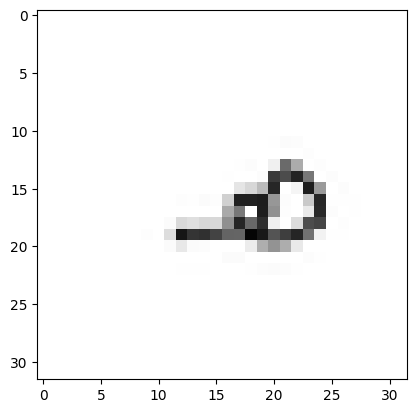

.........2_Step...............
Resize_image


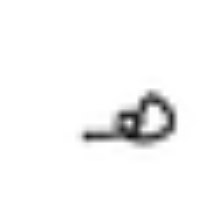

In [28]:
train_data=r'/content/26 ha'
# train_data=r'/content/drive/MyDrive/16 da'
# Classes = ["16.2","16.3","16.4"]
Classes = ["26.1","26.2","26.3","26.4"]

print(".........1_Step...............")
for category in Classes :
    path=os.path.join(train_data,category)
    for img in os.listdir(path):
       img_array=cv2.imread(os.path.join(path,img))
       backtorgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
       plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
       plt.show()
       break
    break
print(".........2_Step...............")
print("Resize_image")
img_size= 224 # ImageNet=>224*224
new_array = resize_with_padding(img_array, (224, 224), padding_color=(255, 255, 255))  # Resize the image with padding and set padding color to white
cv2_imshow(new_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
print("new_array",new_array.shape)
print("old_array")
img_array.shape

new_array (224, 224, 3)
old_array


(32, 32, 3)

In [30]:
import os
import cv2
import random
import numpy as np

print(".........3_Step...............")
print("reading all the images and converting them to arrays")

training_Data = []  # data
labels = []  # labels

def create_training_Data():
    for category in Classes:
        path = os.path.join(train_data, category)
        class_num = Classes.index(category)  # label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append(new_array)
                labels.append(class_num)
            except Exception as e:
                pass

print("training_Data")
create_training_Data()
print(len(training_Data))

print(".........3_Step...............")
temp = np.array(training_Data)
print(temp.shape)

# Combine the training data and labels
combined_data = list(zip(training_Data, labels))
random.shuffle(combined_data)

X = []  # data/feature
Y = []  # label
for features, label in combined_data:
    X.append(features)
    Y.append(label)

print("converting it to 4 dimensions")
X = np.array(X).reshape(-1, img_size, img_size, 3)  # converting it to 4 dimensions
print(X.shape)

.........3_Step...............
reading all the images and converting them to arrays
training_Data
1734
.........3_Step...............
(1734, 224, 224, 3)
converting it to 4 dimensions
(1734, 224, 224, 3)


In [31]:
print(".........4_Step...............")
print("normalize the data")
X=X/255.0;  #we ara normalizrd it
Y=np.array(Y)
Y.shape
X.shape

.........4_Step...............
normalize the data


(1734, 224, 224, 3)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
print(X_train.shape)

(1213, 224, 224, 3)


In [33]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming your training labels are stored in a list or array called 'train_labels'
train_labels = ['ha_iso','ha_first','ha_mid','ha_end']
# train_labels = ['da_first','da_mid','da_end']
# # Convert the labels to numerical format
label_mapping = {'ha_iso':0,'ha_first':1,'ha_mid':2,'ha_end':3}
# label_mapping = {'da_first':0,'da_mid':1,'da_end':2}
train_labels = [label_mapping[label] for label in train_labels]

# Convert the numerical labels to one-hot encoding
num_classes = len(label_mapping)
train_labels = to_categorical(train_labels, num_classes=num_classes)

# The train_labels variable is now ready to be used in model training
train_labels = np.repeat(train_labels, repeats=(len(X_train) // len(train_labels)), axis=0)
train_labels = np.concatenate((train_labels, train_labels[:len(X_train) % len(train_labels)]), axis=0)

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

num_classes = 4
# num_classes = 3
# Load the MobileNet model without the top classification layer
model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the initial layers of the base model
for layer in model.layers[:100]:
    layer.trainable = True

# Add your custom layers for classification
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=model.input, outputs=predictions)

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1
)
train_generator = train_datagen.flow(X_train, train_labels, batch_size=32)

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduling
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3)

# Early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with fine-tuning
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
#train_generator = train_datagen.flow_from_directory(r'/content/drive/MyDrive/2 ba', target_size=(224, 224), batch_size=32, class_mode='categorical')
#test_generator = test_datagen.flow_from_directory(r'/content/drive/MyDrive/min_data_split_/test', target_size=(224, 224), batch_size=32, class_mode='categorical')
# Train the model
y_train_categorical = to_categorical(y_train, num_classes=4)

# Train the model with fine-tuning
history=model.fit(X_train,y_train_categorical, epochs=65,  callbacks=[lr_scheduler, early_stopping])


Epoch 1/65
38/38 [==============================] - ETA: 0s - loss: 0.7256 - accuracy: 0.7181

38/38 [==============================] - 17s 160ms/step - loss: 0.7256 - accuracy: 0.7181 - lr: 1.0000e-04
Epoch 2/65
38/38 [==============================] - ETA: 0s - loss: 0.1668 - accuracy: 0.9497

38/38 [==============================] - 4s 109ms/step - loss: 0.1668 - accuracy: 0.9497 - lr: 1.0000e-04
Epoch 3/65
38/38 [==============================] - ETA: 0s - loss: 0.0565 - accuracy: 0.9852

38/38 [==============================] - 4s 111ms/step - loss: 0.0565 - accuracy: 0.9852 - lr: 1.0000e-04
Epoch 4/65
38/38 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9909

38/38 [==============================] - 4s 109ms/step - loss: 0.0322 - accuracy: 0.9909 - lr: 1.0000e-04
Epoch 5/65
38/38 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9959

38/38 [==============================] - 4s 109ms/step - loss: 0.0219 - accuracy: 0.9959 - lr: 1.0000e-04
Epoch 6/65
38/38 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9984

38/38 [==============================] - 4s 113ms/step - loss: 0.0122 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 7/65
38/38 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9975

38/38 [==============================] - 4s 110ms/step - loss: 0.0105 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 8/65
38/38 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9967

38/38 [==============================] - 4s 111ms/step - loss: 0.0144 - accuracy: 0.9967 - lr: 1.0000e-04
Epoch 9/65
38/38 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9975

38/38 [==============================] - 4s 113ms/step - loss: 0.0076 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 10/65
38/38 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984

38/38 [==============================] - 4s 111ms/step - loss: 0.0051 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 11/65
38/38 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9992

38/38 [==============================] - 4s 111ms/step - loss: 0.0047 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 12/65
38/38 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9975

38/38 [==============================] - 4s 115ms/step - loss: 0.0092 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 13/65
38/38 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000

38/38 [==============================] - 4s 113ms/step - loss: 0.0042 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 14/65
38/38 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9992

38/38 [==============================] - 4s 115ms/step - loss: 0.0031 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 15/65
38/38 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9992

38/38 [==============================] - 4s 114ms/step - loss: 0.0049 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 16/65
38/38 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9992

38/38 [==============================] - 4s 112ms/step - loss: 0.0038 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 17/65
38/38 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9992

38/38 [==============================] - 4s 111ms/step - loss: 0.0033 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 18/65
38/38 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

38/38 [==============================] - 4s 114ms/step - loss: 0.0014 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 19/65
38/38 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992

38/38 [==============================] - 4s 111ms/step - loss: 0.0024 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 20/65
38/38 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

38/38 [==============================] - 4s 111ms/step - loss: 0.0017 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 21/65
38/38 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9992

38/38 [==============================] - 4s 113ms/step - loss: 0.0043 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 22/65
38/38 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9984

38/38 [==============================] - 4s 112ms/step - loss: 0.0054 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 23/65
38/38 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9959

38/38 [==============================] - 4s 110ms/step - loss: 0.0136 - accuracy: 0.9959 - lr: 1.0000e-04
Epoch 24/65
38/38 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9984

38/38 [==============================] - 4s 113ms/step - loss: 0.0065 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 25/65
38/38 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

38/38 [==============================] - 4s 112ms/step - loss: 0.0015 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 26/65
38/38 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000    

38/38 [==============================] - 4s 111ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 27/65
38/38 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

38/38 [==============================] - 4s 112ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 28/65
38/38 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9992

38/38 [==============================] - 4s 112ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 29/65
38/38 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9992

38/38 [==============================] - 4s 111ms/step - loss: 0.0045 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 30/65
38/38 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000

38/38 [==============================] - 4s 113ms/step - loss: 0.0010 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 31/65
38/38 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9984

38/38 [==============================] - 4s 116ms/step - loss: 0.0046 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 32/65
38/38 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9992

38/38 [==============================] - 4s 111ms/step - loss: 0.0029 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 33/65
38/38 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992

38/38 [==============================] - 4s 111ms/step - loss: 0.0030 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 34/65
38/38 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9992

38/38 [==============================] - 4s 114ms/step - loss: 0.0032 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 35/65
38/38 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

38/38 [==============================] - 4s 111ms/step - loss: 0.0018 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 36/65
38/38 [==============================] - ETA: 0s - loss: 7.3122e-04 - accuracy: 1.0000

38/38 [==============================] - 4s 111ms/step - loss: 7.3122e-04 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 37/65
38/38 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

38/38 [==============================] - 4s 113ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 38/65
38/38 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9984

38/38 [==============================] - 4s 111ms/step - loss: 0.0047 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 39/65
38/38 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9951

38/38 [==============================] - 4s 111ms/step - loss: 0.0123 - accuracy: 0.9951 - lr: 1.0000e-04
Epoch 40/65
38/38 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9975

38/38 [==============================] - 4s 114ms/step - loss: 0.0083 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 41/65
38/38 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9926

38/38 [==============================] - 4s 111ms/step - loss: 0.0332 - accuracy: 0.9926 - lr: 1.0000e-04
Epoch 42/65
38/38 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9984

38/38 [==============================] - 4s 111ms/step - loss: 0.0042 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 43/65
38/38 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9975

38/38 [==============================] - 4s 114ms/step - loss: 0.0056 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 44/65
38/38 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9967

38/38 [==============================] - 4s 111ms/step - loss: 0.0097 - accuracy: 0.9967 - lr: 1.0000e-04
Epoch 45/65
38/38 [==============================] - ETA: 0s - loss: 7.6862e-04 - accuracy: 1.0000

38/38 [==============================] - 4s 111ms/step - loss: 7.6862e-04 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 46/65
38/38 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9975

38/38 [==============================] - 4s 114ms/step - loss: 0.0055 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 47/65
38/38 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9975

38/38 [==============================] - 4s 112ms/step - loss: 0.0060 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 48/65
38/38 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

38/38 [==============================] - 4s 111ms/step - loss: 0.0020 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 49/65
38/38 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992

38/38 [==============================] - 4s 113ms/step - loss: 0.0024 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 50/65
38/38 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9992

38/38 [==============================] - 4s 112ms/step - loss: 0.0033 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 51/65
38/38 [==============================] - ETA: 0s - loss: 5.1863e-04 - accuracy: 1.0000

38/38 [==============================] - 4s 111ms/step - loss: 5.1863e-04 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 52/65
38/38 [==============================] - ETA: 0s - loss: 2.9815e-04 - accuracy: 1.0000

38/38 [==============================] - 4s 113ms/step - loss: 2.9815e-04 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 53/65
38/38 [==============================] - ETA: 0s - loss: 1.8237e-04 - accuracy: 1.0000

38/38 [==============================] - 4s 113ms/step - loss: 1.8237e-04 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 54/65
38/38 [==============================] - ETA: 0s - loss: 3.5844e-04 - accuracy: 1.0000

38/38 [==============================] - 4s 111ms/step - loss: 3.5844e-04 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 55/65
38/38 [==============================] - ETA: 0s - loss: 6.9510e-05 - accuracy: 1.0000

38/38 [==============================] - 4s 113ms/step - loss: 6.9510e-05 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 56/65
38/38 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9984

38/38 [==============================] - 4s 113ms/step - loss: 0.0020 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 57/65
38/38 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9975

38/38 [==============================] - 4s 111ms/step - loss: 0.0165 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 58/65
38/38 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9975

38/38 [==============================] - 4s 112ms/step - loss: 0.0085 - accuracy: 0.9975 - lr: 1.0000e-04
Epoch 59/65
38/38 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9984

38/38 [==============================] - 4s 113ms/step - loss: 0.0100 - accuracy: 0.9984 - lr: 1.0000e-04
Epoch 60/65
38/38 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9942

38/38 [==============================] - 4s 114ms/step - loss: 0.0175 - accuracy: 0.9942 - lr: 1.0000e-04
Epoch 61/65
38/38 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9934

38/38 [==============================] - 4s 112ms/step - loss: 0.0210 - accuracy: 0.9934 - lr: 1.0000e-04
Epoch 62/65
38/38 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9926

38/38 [==============================] - 4s 112ms/step - loss: 0.0239 - accuracy: 0.9926 - lr: 1.0000e-04
Epoch 63/65
38/38 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9967

38/38 [==============================] - 4s 111ms/step - loss: 0.0191 - accuracy: 0.9967 - lr: 1.0000e-04
Epoch 64/65
38/38 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992

38/38 [==============================] - 4s 111ms/step - loss: 0.0027 - accuracy: 0.9992 - lr: 1.0000e-04
Epoch 65/65
38/38 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9992

38/38 [==============================] - 4s 113ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 1.0000e-04


In [35]:
model.save('ha.h5')
model=tf.keras.models.load_model('ha.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
y_test_categorical = to_categorical(y_test, num_classes=4)

loss, accuracy=model.evaluate(X_test,y_test_categorical)
print("accuracy=",accuracy)

17/17 [==============================] - 2s 64ms/step - loss: 0.0923 - accuracy: 0.9846
accuracy= 0.984644889831543


In [37]:
SIZE=256
new_model=tf.keras.models.load_model('/content/ha.h5')

.........8_Step...............
list all data in history
.........9_Step...............
dict_keys(['loss', 'accuracy', 'lr'])


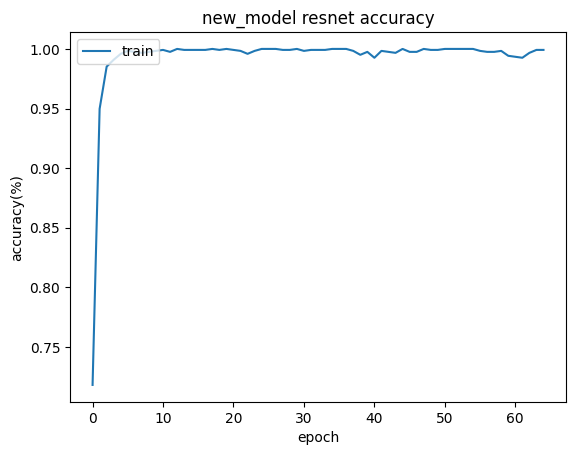

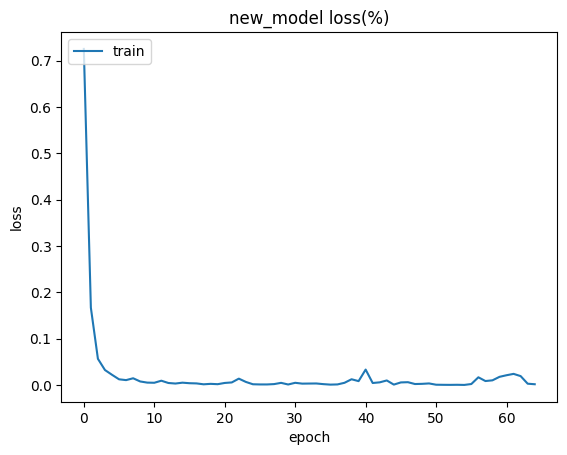

In [38]:
print(".........8_Step...............")
print("list all data in history")
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import file_io
%matplotlib inline
import keras
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import *
import skimage
from skimage.transform import rescale, resize
import pydot
print(".........9_Step...............")
# list all data in history",
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('new_model resnet accuracy')
plt.ylabel('accuracy(%)')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('new_model loss(%)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

In [40]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Load and preprocess the image
img_path = '/content/ha.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)
x = tf.expand_dims(x, axis=0)

# Perform image prediction
new_x = resize_with_padding(x, (256, 256), padding_color=(255, 255, 255))  # Resize the image with padding and set padding color to white
new_x = preprocess_input(new_x)
new_x = tf.expand_dims(x, axis=0)
preds = model.predict(x)
print(preds)

An error occurred during image resizing: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

1/1 [==============================] - 0s 421ms/step
[[0.0028278  0.00155709 0.00520883 0.9904062 ]]


<ipython-input-41-3432097b8b0f>:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = new_model.predict_generator(X_test).argmax(axis=1)


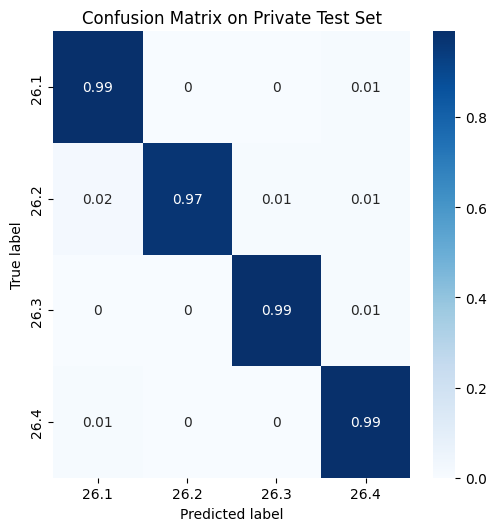

 Finding Accuracy, precision and recall
Accuracy   : 0.9846449136276392
Precision : 0.984866581824251
Recall    : 0.9846449136276392
F1-score  : 0.9846519145078068


In [41]:
#print(".........10_Step...............")
#print(".........Test dataset ...............")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.python.lib.io import file_io

import keras
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from seaborn import heatmap

charr = {0:'26.1', 1:'26.2', 2:'26.3', 3:'26.4'}
# charr = {0:'16.1', 1:'16.2', 2:'16.3'}

y_pred = new_model.predict_generator(X_test).argmax(axis=1)
y_true = y_test

cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=charr.values(),
  columns=charr.values()
  )
plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Private Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(" Finding Accuracy, precision and recall")
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred,average="weighted")
print("Precision :", precision)
recall = recall_score(y_test, y_pred,average="weighted")
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred,average="weighted")
print("F1-score  :", F1_score)

.........12_Step...............
1/1 [==============================] - 0s 19ms/step
The prediction for this image is:  [5.4537197e-09 1.1320486e-08 1.0000000e+00 4.0521106e-09]
The actual label for this image is:  2


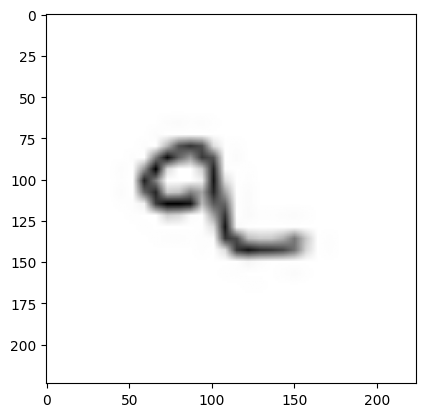

In [42]:
from sklearn.preprocessing import LabelEncoder
print(".........12_Step...............")
#Check results on a few select images
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img = np.reshape(input_img, (224, 224, 3))
input_img = np.expand_dims(input_img, axis=0)
input_img_feature=model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img)[0]
le = LabelEncoder()
# prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", y_test[n])

.........12_Step...............


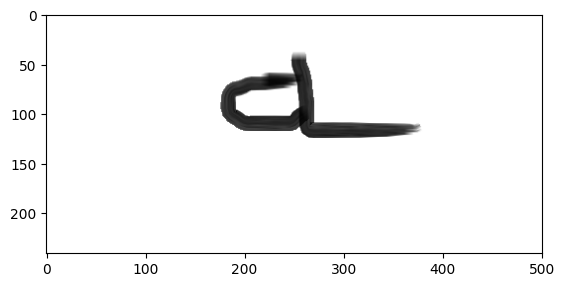

1/1 [==============================] - 0s 20ms/step
The prediction for this image is: 2


In [49]:
from sklearn.preprocessing import LabelEncoder
import cv2

print(".........12_Step...............")

# Choose a random image from the test set
n = np.random.randint(0, X_test.shape[0])

# Provide the file path of the image
img_path = '/content/ha3.png'

# Read the image using OpenCV
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()

# Preprocess the image for prediction
input_img = cv2.resize(img, (224, 224))  # Resize the image to match the input size of the model
input_img = np.expand_dims(input_img, axis=0)  # Expand dims so the input is (num images, x, y, c)
input_img = input_img / 255.0  # Normalize the image pixels to the range [0, 1]

# Make the prediction
input_img_feature = new_model.predict(input_img)
input_img_features = input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = new_model.predict(input_img)[0]

# Fit the LabelEncoder with training labels
le = LabelEncoder()
le.fit(y_train)

# Reverse the label encoding to get the original class name
prediction = le.inverse_transform([np.argmax(prediction)])[0]

print("The prediction for this image is:", prediction)
# print("The actual label for this image is:", y_test[n])